A schelling model with continuous wealth and vacant exchange rule(wealth can be seen as a "continuous differentiator", for now )(this can bbe used to show that athough we model it the shift as an agents choice,however in the market this affordability paradigm naturally arises from the average wealth of the neighbourhood(houses themselves being assets))

Start with 2 types of agents and consider moore neighborhood of every agent


In [1]:
import numpy as np
import random
import math
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors


Initialising all the variables

In [137]:
width=50 #width of the landscape(x)
length=50#length of the landscape(y)
percent_vacant=0.20
percent_type_1=0.5
percent_type_2=(1-percent_type_1)
agent_occupancy_rate=(1-percent_vacant)
number_of_agents=math.floor((width*length)*agent_occupancy_rate)
numberof1s=math.floor(percent_type_1*number_of_agents)
numberof2s=number_of_agents-numberof1s
vacant_tiles= (length*width)-number_of_agents
x=np.arange(0,width,1)#initialize the grid
y=np.arange(0,length,1)#initialize the grid
#np.random.shuffle(x)
#np.random.shuffle(y)
avg_wealth=100
stdev=3
wealth=np.absolute(np.random.normal(avg_wealth,stdev,number_of_agents))
randomallocatecoord=np.arange(0,length*width,1)#Help randomly intialiize initial position of the agents
np.random.shuffle(randomallocatecoord)
tolerance=np.ones(number_of_agents)*3
#tolerance[0:3]=0
#tolerance[number_of_agents-4:number_of_agents-1]=0
track=np.zeros((length,width)) #a golobal variable to track which agent is in which position




In [138]:
class Agent():
    coord=[]
    def __init__(self,i,x_coord,y_coord,wealth_agent,toler,type):
        self.agent_id=i
        self.coord=[x_coord,y_coord]
        self.wealth=wealth_agent
        self.tol=toler
        self.type=type
    print(coord)


[]


Allocate coordinates to the agents randomly and also store the location of vacant cells

In [139]:
randomallocatecoord=np.arange(0,length*width,1)
agents=[] #agents indexed by agent id
vacant=[]
track=(np.ones((length,width))*(-1)).astype(int)#agentid indexed by their coordinates
j=0
y_coord=-1
x_coord=-1
np.random.shuffle(randomallocatecoord)
for i in range(length*width): # i represents the agent number and not the grid position
   x_coord=int(randomallocatecoord[i]%length)
   y_coord=int((randomallocatecoord[i]/width))
   
   if i<number_of_agents: # while loop running over the agent indices
      if i<numberof1s : #first set are agents of type 1
        agents.append(Agent(i,x_coord,y_coord,wealth[i],tolerance[i],1))
      else:
         agents.append(Agent(i,x_coord,y_coord,wealth[i],tolerance[i],2)) #after that agents of type 2
      track[x_coord][y_coord]=int(i)
   else:
      vacant.append([x_coord,y_coord]) #remaining are vacant cells
    


Make a function to print the matrix of the agent in their landscape

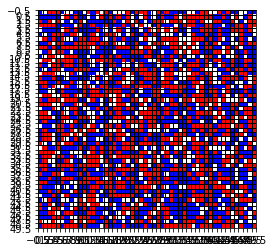

In [140]:
%matplotlib inline
def print_grid(all_agent_info):
    grid=np.zeros((length,width))
    i=0
    for i in range(number_of_agents):
        grid[all_agent_info[i].coord[0]][all_agent_info[i].coord[1]]=all_agent_info[i].type
    cmap = colors.ListedColormap(['white','red', 'blue'])
    bounds = [-0.1,0.1,1.1,2.1]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(grid, cmap=cmap, norm=norm)

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
    ax.set_xticks(np.arange(-0.5, length, 1))
    ax.set_yticks(np.arange(-0.5, width, 1))
    plt.show()


print_grid(agents)

In [141]:
track

array([[1076,   -1,  719, ...,   -1, 1709, 1772],
       [1199, 1626, 1242, ..., 1413,  959,   -1],
       [ 497, 1974,  388, ...,   -1,  861,  328],
       ...,
       [1428, 1031, 1650, ...,  323,   -1, 1643],
       [ 755,   -1,   -1, ..., 1205,   -1,   -1],
       [1509,  873,    2, ..., 1714, 1312,  214]])

Make code for finding initial unhappy agents

In [142]:
unhappy_agents=[] 
t=0
test=0
end=7
coord=np.zeros(2)
nb=np.array([[-1,-1],[-1,0],[-1,1],[0,1],[0,-1],[1,-1],[1,0],[1,1]])
for i,a in enumerate(agents):
     test=0
     t=np.array(a.tol)
     coord=np.array(a.coord)
     neighbours=np.copy(nb)
     # Taking care of boundary conditions(Torus=false)
     if coord[0]==0:
          neighbours=np.array(list(set(map(tuple, neighbours)) - set(map(tuple,np.array([[-1,-1],[-1,0],[-1,1]])))))
     elif coord[0]==(width-1):
          neighbours=np.array(list(set(map(tuple, neighbours)) - set(map(tuple,np.array([[1,-1],[1,0],[1,1]])))))
     if coord[1]==0:
          neighbours=np.array(list(set(map(tuple, neighbours)) - set(map(tuple,np.array([[-1,-1],[0,-1],[1,-1]])))))
     elif coord[1]==(length-1):
          neighbours=np.array(list(set(map(tuple, neighbours)) - set(map(tuple,np.array([[-1,1],[0,1],[1,1]])))))
    
     for nbhood in neighbours: #looping over all available neighbours
          nghbr_coord=nbhood+coord
          id=track[nghbr_coord[0]][nghbr_coord[1]]
          if id!=-1:#checking if neighboring cell is vacant
            if agents[id].type!=a.type :#testing if agent type of neighbour same as original
                 test+=1
     if test>a.tol :
          unhappy_agents.append(i) #appending agent_id of unhappy agent

len(unhappy_agents)

     
          

771

In [143]:
neighbours=np.array([[-1,-1],[-1,0],[-1,1],[0,1],[0,-1],[1,-1],[1,0],[1,1]])
np.delete(neighbours,[0,1],0)

array([[-1,  1],
       [ 0,  1],
       [ 0, -1],
       [ 1, -1],
       [ 1,  0],
       [ 1,  1]])

Once 2 agents are exchanged, new "unhappy agents" would be the ones in the moore neighborhood of the exchanged positions, so this is code to check happiness of agents in the moore negihborhood of exchange and add them to unhappy list if they are disgruntled, and to remove the agents that exchanged positions from unhappy agents list if they are happy.  

In [144]:
#old_coord and new_coord are integer lists
def unhappy_agents_update(agents,track,old_coord,new_coord): #old_coord is supposed to be the original coordinate of agent before "migration", new_coord is coordinate of agent after exchange
    
    nb=np.array([[-1,-1],[-1,0],[-1,1],[0,1],[0,-1],[1,-1],[1,0],[1,1]])
    t=0
    #if exchanged agent is satisfied then remove 
    coord=new_coord 
    i=track[new_coord[0]][new_coord[1]]
    a=agents[i]
    neighbours=np.array([[-1,-1],[-1,0],[-1,1],[0,1],[0,-1],[1,-1],[1,0],[1,1]])
    test=0
    t=(a.tol)
    coord=np.array(a.coord)
    neighbours=np.copy(nb)
    # Taking care of boundary conditions(Torus=false)
    if coord[0]==0:
          neighbours=np.array(list(set(map(tuple, neighbours)) - set(map(tuple,np.array([[-1,-1],[-1,0],[-1,1]])))))
    elif coord[0]==(width-1):
          neighbours=np.array(list(set(map(tuple, neighbours)) - set(map(tuple,np.array([[1,-1],[1,0],[1,1]])))))
    if coord[1]==0:
          neighbours=np.array(list(set(map(tuple, neighbours)) - set(map(tuple,np.array([[-1,-1],[0,-1],[1,-1]])))))
    elif coord[1]==(length-1):
          neighbours=np.array(list(set(map(tuple, neighbours)) - set(map(tuple,np.array([[-1,1],[0,1],[1,1]])))))
          
    for nbhood in neighbours: #looping over all available neighbours
         nghbr_coord=nbhood+coord
         id=track[nghbr_coord[0]][nghbr_coord[1]]
         if id!=-1:#checking if neighboring cell is vacant
           if agents[id].type!=a.type :#testing if agent type of neighbour same as original
                test+=1
    if test<=t:
      unhappy_agents.remove(a.agent_id)
    test=0
    #see how many neighbours of old_coord and new_coord exist and then check their satisfaction
    neighbours=np.copy(nb)
    master_coord=[np.array(old_coord),np.array(new_coord)]
    for coord in master_coord: #check the happiness of agents who are neighbours of places that suffered a change
      neighbours=np.copy(nb)
      for nbhood in neighbours:
           neighbours_of_migrants=np.copy(nb)
           check_coord=coord+np.array(nbhood) #neighbour of migrants
           test=0 #below if statement checks if the neighbours(old and new) coordinates of migrants are valid or not
           if(check_coord[0]>=0 and check_coord[0]<width and check_coord[1]>=0 and check_coord[1]<length): #there might be error here in the usage of and operator
               check_agent=agents[track[check_coord[0]][check_coord[1]]]#agent object of neighbour of migrant
               if check_coord[0]==0:
                  neighbours_of_migrants=np.array(list(set(map(tuple, neighbours_of_migrants)) - set(map(tuple,np.array([[-1,-1],[-1,0],[-1,1]])))))
               elif check_coord[0]==(width-1):
                  neighbours_of_migrants=np.array(list(set(map(tuple, neighbours_of_migrants)) - set(map(tuple,np.array([[1,-1],[1,0],[1,1]])))))
               if check_coord[1]==0:
                  neighbours_of_migrants=np.array(list(set(map(tuple, neighbours_of_migrants)) - set(map(tuple,np.array([[-1,-1],[0,-1],[1,-1]])))))
               elif check_coord[1]==(length-1):
                  neighbours_of_migrants=np.array(list(set(map(tuple, neighbours_of_migrants)) - set(map(tuple,np.array([[-1,1],[0,1],[1,1]])))))
               for nbnbhood in neighbours_of_migrants: #looping over all available neighbours
                  nghbrnbr_coord=nbnbhood+check_coord #neighbour of neighbour of migrants
                  id=track[nghbrnbr_coord[0]][nghbrnbr_coord[1]]
                  if id!=-1:#checking if neighboring cell is vacant
                     if agents[id].type!=check_agent.type :#testing if agent type of neighbour same as original
                          test+=1
               if check_agent.agent_id not in unhappy_agents:
                 if test>check_agent.tol :
                   unhappy_agents.append(check_agent.agent_id) #appending agent_id of unhappy agent
                

    

#We need to check if the element we are appending is already in the array


    

This is a discrete schelling model. An analogue of ising model. If the number of neighbors are more disimilar than an agent's threshold then the agent is unhappy and tries to shift.

Possible experiments, what happens if each agent has a different threshold, how does that effect the final state.

Writing code for exchanging agents

In [145]:
iter=0
e=len(unhappy_agents)    #Agent shifts to vacant block if he is less unhappy in new block as compared to current block
while e>0:
  if iter>=250000:
    break
  migrant_index=random.randint(0,e-1)
  migrant=agents[unhappy_agents[migrant_index]]
  l=len(vacant)
  vacant_index=random.randint(0,l-1)
  vacant_coord=np.copy(vacant[vacant_index])
  agent_coord=np.copy(migrant.coord)

  #This code checks whether agent will be happy in new position
  nb=np.array([[-1,-1],[-1,0],[-1,1],[0,1],[0,-1],[1,-1],[1,0],[1,1]])
  t=0
    #if exchanged agent is satisfied in new position then migrate
  i=track[vacant_coord[0]][vacant_coord[1]]
  neighbours=np.array([[-1,-1],[-1,0],[-1,1],[0,1],[0,-1],[1,-1],[1,0],[1,1]])
  test=[0,0]
  coordinates=[np.copy(agent_coord)]
  coordinates.append(np.copy(vacant_coord))
  for i, coord in enumerate(coordinates):
    neighbours=np.copy(nb)
    # Taking care of boundary conditions(Torus=false)
    if coord[0]==0:
          neighbours=np.array(list(set(map(tuple, neighbours)) - set(map(tuple,np.array([[-1,-1],[-1,0],[-1,1]])))))
    elif coord[0]==(width-1):
          neighbours=np.array(list(set(map(tuple, neighbours)) - set(map(tuple,np.array([[1,-1],[1,0],[1,1]])))))
    if coord[1]==0:
          neighbours=np.array(list(set(map(tuple, neighbours)) - set(map(tuple,np.array([[-1,-1],[0,-1],[1,-1]])))))
    elif coord[1]==(length-1):
          neighbours=np.array(list(set(map(tuple, neighbours)) - set(map(tuple,np.array([[-1,1],[0,1],[1,1]])))))
    
    for nbhood in neighbours: #looping over all available neighbours
         nghbr_coord=nbhood+coord
         id=track[nghbr_coord[0]][nghbr_coord[1]]
         if id!=-1:#checking if neighboring cell is vacant
           if agents[id].type!=migrant.type :#testing if agent type of neighbour same as original
                test[i]+=1
#End of Happiness checking code test is the variable that holds whether neighbours of new position

  if test[1]<test[0]:
    migrant.coord=vacant_coord
    vacant[vacant_index]=agent_coord
    track[vacant[vacant_index][0]][vacant[vacant_index][1]]=-1
    track[migrant.coord[0]][migrant.coord[1]]=migrant.agent_id
    unhappy_agents_update(agents,track,vacant[vacant_index],migrant.coord)
  iter+=1
  e=len(unhappy_agents)
 

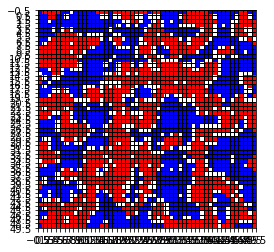

In [146]:
print_grid(agents)

In [147]:
unhappy_agents


[18,
 53,
 62,
 66,
 83,
 102,
 177,
 224,
 243,
 378,
 413,
 427,
 435,
 505,
 595,
 601,
 624,
 704,
 731,
 742,
 746,
 763,
 767,
 796,
 865,
 875,
 891,
 918,
 980,
 1046,
 1081,
 1088,
 1092,
 1126,
 1283,
 1323,
 1352,
 1357,
 1392,
 1403,
 1431,
 1435,
 1436,
 1503,
 1514,
 1516,
 1517,
 1537,
 1539,
 1570,
 1573,
 1667,
 1684,
 1790,
 1794,
 1819,
 1833,
 1848,
 1906,
 1941,
 1966,
 1994,
 913,
 458,
 179,
 391,
 192,
 839,
 1788,
 1297,
 728,
 199,
 1872,
 1433,
 1764,
 1434,
 1999]

In [148]:
e

77

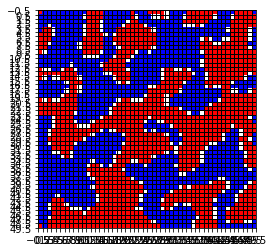

In [98]:
%matplotlib inline
grid=np.zeros((length,width))
i=0
for i in range(number_of_agents):
  grid[agents[i].coord[0]][agents[i].coord[1]]=agents[i].type

cmap = colors.ListedColormap(['white','red', 'blue'])
bounds = [-0.1,0.1,1.1,2.1]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(grid, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
ax.set_xticks(np.arange(-0.5, length, 1))
ax.set_yticks(np.arange(-0.5, width, 1))
plt.show()